In [32]:
import pandas as pd
import numpy as np

### 농구 선수의 게임 데이터를 활용한 포지션 예측을 우한 데이터 정제
NBA 농구 선수들의 게임 기록을 데이터로 사용해서 특정 농구 선수의 포지션을 예측

In [33]:
df=pd.read_csv('../Data/basketball.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


- Pos : 포지션 (SG : Shooting Guard , C : Center)
- 3P : 3점 슛 평균
- 2P : 2점 슛 평균
- TRB : 리바운드 성공 횟수 평균
- AST : 어시스트 횟수 평균
- STL : 스틸 횟수 평균
- BLK : 블락 횟수 평균

In [34]:
df['Pos'].value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [35]:
df.describe(include='all')

,Player,Pos,3P,2P,TRB,AST,STL,BLK
count,100,100,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000
unique,100,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Alex Abrines,SG,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,50,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.08200,3.265000,5.030000,1.892000,0.725000,0.69600
std,NaN,NaN,0.91424,1.843053,3.098599,1.257357,0.343004,0.59661
min,NaN,NaN,0.00000,0.500000,1.300000,0.200000,0.000000,0.10000
25%,NaN,NaN,0.00000,1.900000,2.875000,0.975000,0.500000,0.20000
50%,NaN,NaN,1.30000,2.900000,3.900000,1.500000,0.700000,0.55000
75%,NaN,NaN,1.80000,4.450000,6.325000,2.600000,0.925000,1.00000


### 포지션 별 내용
- C : Center는 골대 포스트 근처에서 슛을 블락하고 , 리바운드 하며 , 바깥으로 쳐내며 골대 근처에서 2점슛으로 득점을 한다.
- SG : Shooting Guard는 코트내에서 3점슛 등 장거리에서 슛을 해서 점수를 얻는 역할

In [36]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")
warnings.filterwarnings('ignore')

### 스틸과 2점슛 시각화

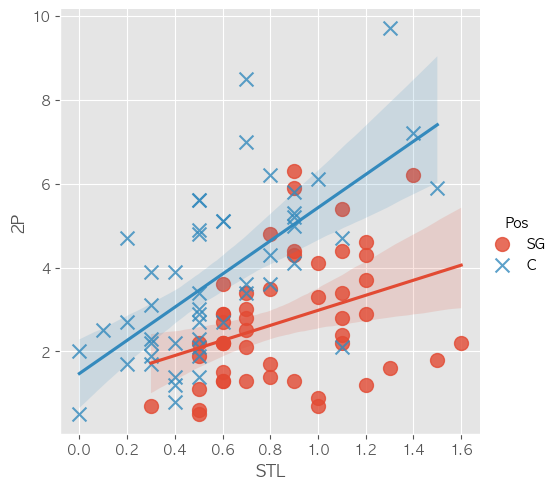

In [37]:
plt.style.use('ggplot')

sns.lmplot(x='STL',y='2P',
    data=df,
    fit_reg=True,
    scatter_kws={'s':100}, # 좌표상의 점의 크기
    markers=['o','x'],
    hue='Pos'
)

plt.show()

### 어시스트, 2점슛

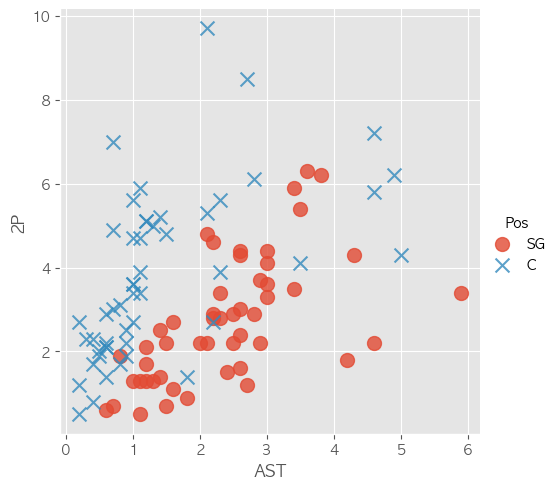

In [38]:
plt.style.use('ggplot')

sns.lmplot(x='AST',y='2P',
    data=df,
    fit_reg=False,
    scatter_kws={'s':100}, # 좌표상의 점의 크기
    markers=['o','x'],
    hue='Pos'
)


plt.show()

### 기타 해보기

In [39]:
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


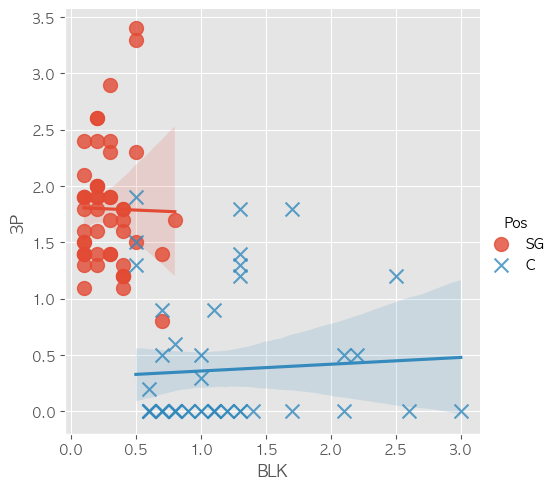

In [40]:
plt.style.use('ggplot')

sns.lmplot(x='BLK',y='3P',
    data=df,
    fit_reg=True,
    scatter_kws={'s':100}, # 좌표상의 점의 크기
    markers=['o','x'],
    hue='Pos'
)


plt.show()

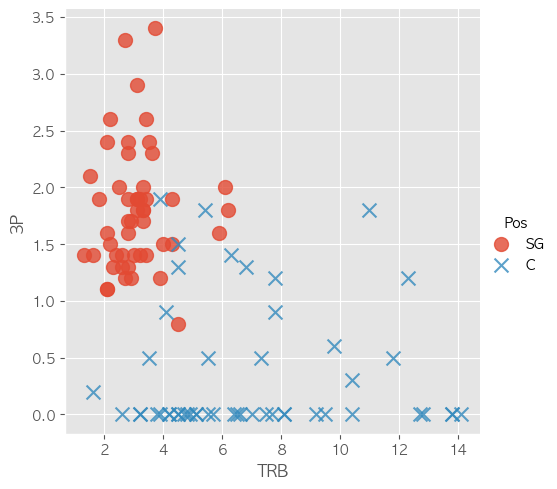

In [41]:
plt.style.use('ggplot')

sns.lmplot(x='TRB',y='3P',
    data=df,
    fit_reg=False,
    scatter_kws={'s':100}, # 좌표상의 점의 크기
    markers=['o','x'],
    hue='Pos'
)


plt.show()

### 데이터 다음기
- 분별력이 없는 Feature 데이터에서 제거
- 시각화를 통해 확인해 본 결과 , 2P , STL , AST 필요 없다. 

In [42]:
del df['2P']
del df['STL']
del df['AST']

In [43]:
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


### 학습 데이터와 검증 데이터로 나누기

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다. 
train , test = train_test_split(df,test_size=0.2)

In [46]:
# 데이터 저장하기
train.to_csv('../Data/basketball_train.csv',index=False)
test.to_csv('../Data/basketball_test.csv',index=False)